In [1]:
import pandas as pd

# import the data
data = pd.read_csv('./data/boystown.csv', sep=' ');

In [2]:
# transform categorical variables
data['sex'] -= 1;
data['dadjob'] -= 2;
data['momjob'] -= 2;

def map_gpa(gpa):
    if(gpa >= 3):
        return 0;
    return 1;

data['gpa'] = [map_gpa(gpa) for gpa in data['gpa']];

In [3]:
from sklearn.model_selection import train_test_split

# split train test samples
X = data.drop('gpa', axis=1);
Y = data['gpa'];

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# scale the data
def scale(x):
    x_frame = pd.DataFrame(x, columns=['values']);
    scaler = StandardScaler();
    return scaler.fit_transform(x_frame);

# normalize the data
def normalize(x):
    x = np.array(x);
    return ((x - min(x)) / (max(x)-min(x)));

for label, content in X.items():
    X[label] = scale(content.tolist());

X

,id,sex,Alcoholuse,alcatt,dadjob,momjob,dadclose,momclose,larceny,vandalism
1,-1.723412,-1.333333,-0.992060,0.864488,-0.333333,0.608164,-0.595247,-0.700101,0.082796,0.755483
2,-1.706091,-1.333333,0.068967,0.155891,-0.333333,0.608164,0.757587,1.522442,-0.952154,-1.304925
3,-1.688771,-1.333333,-0.992060,0.864488,-0.333333,0.608164,0.081170,0.040747,-0.952154,0.068680
4,-1.671450,-1.333333,-0.992060,-0.552705,-0.333333,0.608164,-0.595247,0.040747,2.152697,0.068680
5,-1.654129,0.750000,1.129993,0.155891,-0.333333,-1.644294,0.081170,-0.700101,0.082796,0.068680
...,...,...,...,...,...,...,...,...,...,...
196,1.654129,0.750000,0.599480,0.155891,-0.333333,0.608164,0.081170,-1.440948,-0.952154,0.068680
197,1.671450,0.750000,0.068967,1.573084,-0.333333,0.608164,0.081170,-1.440948,0.082796,-0.618123
198,1.688771,-1.333333,-2.053087,-1.261302,-0.333333,-1.644294,0.081170,-1.440948,-0.952154,0.755483
199,1.706091,-1.333333,-1.522573,0.155891,-0.333333,0.608164,-1.271664,-1.440948,-0.952154,1.442286


In [5]:
# sample data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, shuffle=True);

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# train for a range of k
evalArray = [];
for k in range(2, 15):
    model = KNeighborsClassifier(n_neighbors=k);
    model.fit(X, Y);

    trainScore = model.score(Xtrain, Ytrain);
    testScore = model.score(Xtest, Ytest);
    evalArray.append((k, trainScore, testScore));

In [7]:
# print results
evalArray = np.array(evalArray, dtype=[('k', int), ('train', float), ('test', float)]);

#print(evalArray);

# sort and reverse array
evalArray.sort(axis=0, order='test');
evalArray = evalArray[::-1];

#evalArray.columns(['K', 'Train', 'Test']);
# print('K\tTrain\tTest');
# for k, trainScore, testScore in evalArray.tolist():
# 	print(k,
# 		'\t', "{:.2f}".format(trainScore),
# 		'\t', "{:.2f}".format(testScore));

evalArray = pd.DataFrame(evalArray.flatten());
evalArray

,k,train,test
0,2,0.773333,0.78
1,3,0.813333,0.76
2,6,0.686667,0.74
3,9,0.666667,0.72
4,11,0.666667,0.70
5,7,0.693333,0.70
6,5,0.713333,0.70
7,13,0.646667,0.68
8,10,0.660000,0.68
9,12,0.693333,0.66


In [8]:
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS

# cluster the data

model = TSNE()
clustering2D = model.fit_transform(X);

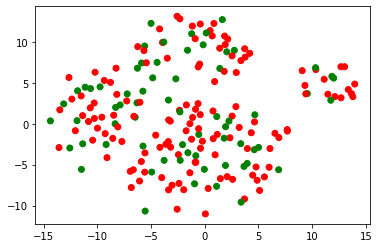

In [9]:
import matplotlib.pyplot as plt

# visualize clusters

def getColor(gpa):
    return 'red' if (gpa == 1) else 'green';

plt.scatter(clustering2D[:,0], clustering2D[:,1], c=[getColor(gpa) for gpa in Y]);
plt.show();

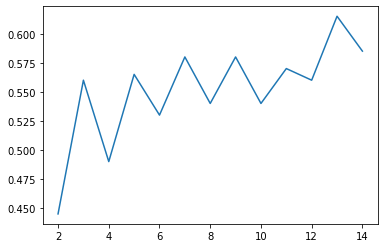

In [25]:
from sklearn.model_selection import cross_val_score

evalArray = [];
for k in range(2, 15):
    model = KNeighborsClassifier(n_neighbors=k);
    scores = cross_val_score(model, X, Y, cv=5);
    evalArray.append([k, np.mean(scores)]);

evalArray = np.array(evalArray);
plt.plot(evalArray[:,0], evalArray[:,1]);
